This is merged notebook format for the production version of the data cleaning and EDA.

**Please note: variable's as follows**

df - dataframe:

df['approve_bin'] - binary assignment for if approved or not

df['latino_bin'] - binary assignment for latino or not

# Imports and Functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Function Definition Block, we can also opt to use a configuration file instead

In [2]:
def latino_bin(value):
    if value == 'Hispanic or Latino': output = 1
    else: output = 0
    return output

In [3]:
def loan_approved_bin(value):
    accepted = ["Loan originated",
                "Application approved but not accepted",
                "Loan purchased by the institution"]
    if value in accepted:
        return 1
    return 0

In [4]:
def reduce_large_strings(df):
    to_replace = ["Information not provided by applicant in mail, Internet, or telephone application",
                  "Native Hawaiian or Other Pacific Islander",
                  "One-to-four family dwelling (other than manufactured housing)"]
    replace_with = ["Information not Provided",
                    "Native Hawaiian/Pacific Islander",
                    "1-4 Family House"]
    for col in df.columns:
        if df[col].dtype == object:
            for i, _ in enumerate(to_replace):
                df[col] = np.where(df[col] == to_replace[i], replace_with[i], df[col])            
    return df

placeholder data read in, we can scale this to either read in one set at aa time or run in multiple sets -> concat -> eda/clean

In [5]:
fl_df=pd.read_csv('../cfpb_data/hmda_2017_fl_all-records_labels.csv',low_memory=False)

In [6]:
fl_df.head(5)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000497404,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,NaN,NaN,NaN,17107.0,70.050003,58400.0,73.940002,2546.0,4722.0,NaN
1,2017,0000852218,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3453.0,88.790001,51800.0,148.229996,915.0,1195.0,NaN
2,2017,0000068490,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,5589.0,30.150000,64300.0,134.110001,1378.0,1780.0,NaN
3,2017,0542409990,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,16880.0,44.910000,58400.0,113.730003,3115.0,4773.0,NaN
4,2017,39-2001010,Federal Deposit Insurance Corporation,FDIC,3,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,8016.0,87.910004,58400.0,65.910004,1155.0,2134.0,NaN


Using Vadim's index

In [7]:
indices_list=['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'co_applicant_race_name_1',
       'co_applicant_race_1', 'applicant_sex_name', 'applicant_sex',
       'co_applicant_sex_name', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type_name', 'purchaser_type', 'denial_reason_name_1',
       'denial_reason_1', 'denial_reason_name_2', 'denial_reason_2',
       'denial_reason_name_3', 'denial_reason_3', 'hoepa_status_name',
       'hoepa_status', 'lien_status_name', 'lien_status', 'population',
       'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'number_of_owner_occupied_units',
       'number_of_1_to_4_family_units']

In [8]:
fl_df=fl_df[indices_list]

### Initial Read and Filter

In [9]:
fl_df.head(5)

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,hoepa_status_name,hoepa_status,lien_status_name,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units
0,2017,0000497404,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home improvement,...,Not a HOEPA loan,2,Not secured by a lien,3,17107.0,70.050003,58400.0,73.940002,2546.0,4722.0
1,2017,0000852218,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,Not a HOEPA loan,2,Secured by a first lien,1,3453.0,88.790001,51800.0,148.229996,915.0,1195.0
2,2017,0000068490,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,Not a HOEPA loan,2,Secured by a first lien,1,5589.0,30.150000,64300.0,134.110001,1378.0,1780.0
3,2017,0542409990,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,16880.0,44.910000,58400.0,113.730003,3115.0,4773.0
4,2017,39-2001010,Federal Deposit Insurance Corporation,FDIC,3,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,Not a HOEPA loan,2,Secured by a first lien,1,8016.0,87.910004,58400.0,65.910004,1155.0,2134.0


In [10]:
fl_df.isnull().sum().sort_values(ascending=False).head(10)

denial_reason_3          1015330
denial_reason_name_3     1015330
denial_reason_name_2      994513
denial_reason_2           994513
denial_reason_1           902325
denial_reason_name_1      902325
applicant_income_000s     138435
msamd_name                 27922
msamd                      27675
census_tract_number         6140
dtype: int64

In [11]:
#Create a a bin of approved and not approved. Likely to be our target
fl_df["approve_bin"] = fl_df["action_taken_name"].map(lambda x: loan_approved_bin(x))

In [12]:
#Make a column of Latino, not Latinto
fl_df["latino"] = fl_df['applicant_ethnicity_name'].map(lambda x: latino_bin(x))

In [13]:
# Reduce long strings to "Information not Provided"
fl_df = reduce_large_strings(fl_df)

In [14]:
# Limit incomes to >15% and <85%
prcntl = fl_df['applicant_income_000s'].quantile([0.15,0.85]).values
fl_df = fl_df[(fl_df['applicant_income_000s'] > prcntl[0]) &
              (fl_df['applicant_income_000s'] < prcntl[1])]

In [15]:
print("Baseline Score of loan provided:",(round(100*fl_df["approve_bin"].mean(),2)),"% ")

Baseline Score of loan provided: 64.55 % 


# EDA 

### Counts

In [16]:
# This variable will likely be left off in favro of Latino or Not Latino
fl_df['applicant_ethnicity_name'].value_counts()

Not Hispanic or Latino      416409
Hispanic or Latino          111043
Information not Provided     68978
Not applicable               11392
Name: applicant_ethnicity_name, dtype: int64

In [17]:
#Oddly missing Latino. Assuming it is because latinos identify as different races
fl_df['applicant_race_name_1'].value_counts()

White                               446072
Information not Provided             74509
Black or African American            54518
Asian                                15978
Not applicable                       11158
American Indian or Alaska Native      3369
Native Hawaiian/Pacific Islander      2218
Name: applicant_race_name_1, dtype: int64

In [18]:
# Note: Predominantly male
fl_df['applicant_sex_name'].value_counts()

Male                        369778
Female                      183900
Information not Provided     42995
Not applicable               11149
Name: applicant_sex_name, dtype: int64

In [19]:
numerical_features = fl_df.select_dtypes(include="number").columns.tolist()
print(f'There are {len(numerical_features)} numerical features:','\n')
print(numerical_features)

There are 34 numerical features: 

['as_of_year', 'agency_code', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'loan_amount_000s', 'preapproval', 'action_taken', 'msamd', 'state_code', 'county_code', 'census_tract_number', 'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1', 'co_applicant_race_1', 'applicant_sex', 'co_applicant_sex', 'applicant_income_000s', 'purchaser_type', 'denial_reason_1', 'denial_reason_2', 'denial_reason_3', 'hoepa_status', 'lien_status', 'population', 'minority_population', 'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units', 'number_of_1_to_4_family_units', 'approve_bin', 'latino']


In [20]:
categorical_features = fl_df.select_dtypes(exclude ="number").columns.tolist()
print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 25 categorical features: 

['respondent_id', 'agency_name', 'agency_abbr', 'loan_type_name', 'property_type_name', 'loan_purpose_name', 'owner_occupancy_name', 'preapproval_name', 'action_taken_name', 'msamd_name', 'state_name', 'state_abbr', 'county_name', 'applicant_ethnicity_name', 'co_applicant_ethnicity_name', 'applicant_race_name_1', 'co_applicant_race_name_1', 'applicant_sex_name', 'co_applicant_sex_name', 'purchaser_type_name', 'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3', 'hoepa_status_name', 'lien_status_name']


In [21]:
# population counts by region
fl_df[['msamd','msamd_name','population']].groupby(['msamd','msamd_name']).sum().sort_values(by = 'population', ascending = False).reset_index()

,msamd,msamd_name,population
0,36740.0,"Orlando, Kissimmee, Sanford - FL",741348335.0
1,45300.0,"Tampa, St. Petersburg, Clearwater - FL",476975830.0
2,27260.0,Jacksonville - FL,453075830.0
3,22744.0,"Fort Lauderdale, Pompano Beach, Deerfield Beac...",320619958.0
4,33124.0,"Miami, Miami Beach, Kendall - FL",316178946.0
5,48424.0,"West Palm Beach, Boca Raton, Delray Beach - FL",205917748.0
6,35840.0,"North Port, Sarasota, Bradenton - FL",204207128.0
7,38940.0,Port St. Lucie - FL,169081361.0
8,15980.0,"Cape Coral, Fort Myers - FL",146382691.0
9,37340.0,"Palm Bay, Melbourne, Titusville - FL",141686176.0


# Filter to Metro Area
----
Team is opting to filter to only using the mtro areas to avoid disparities in pay between metropolitan and rural areas.

Florida has several large populations so data will be limited to the top 3 Metro Areas and Miami. Skipping Fort Lauderdale.

In [22]:
#Filter to Metro Areas: Orlando, Jacksonville, Miami and Tampa
cities = [36740.0, 27260.0, 33124.0, 45300.0]
fl_df = fl_df[fl_df["msamd"].isin(cities)]
# MSAMD values Orlando = 36740, Jacksonville = 26420, Miami = 33124. Tampa = 45300.0

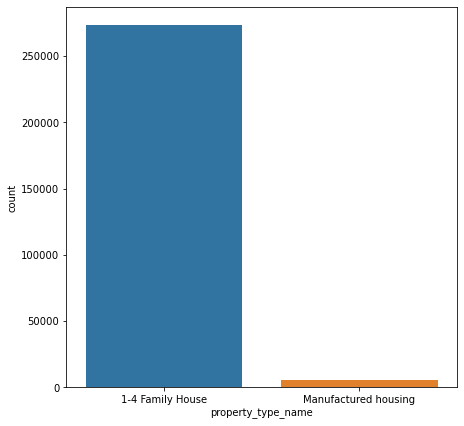

In [23]:
plt.figure(figsize=(7,7), facecolor="w")
sns.countplot(data=fl_df, x='property_type_name');

In [24]:
# Drop Property_Type, too skewed to give relevant info
fl_df = fl_df.drop(columns=["property_type_name"])

## Plots
----

#### Count of Applicants by Race: Approved, Not Approved
----
One major thing to note here is the amount of white that were approved are about 50%. The other races are signifigantly more likely to be denied other than those who opted to withhold their race in the applications.

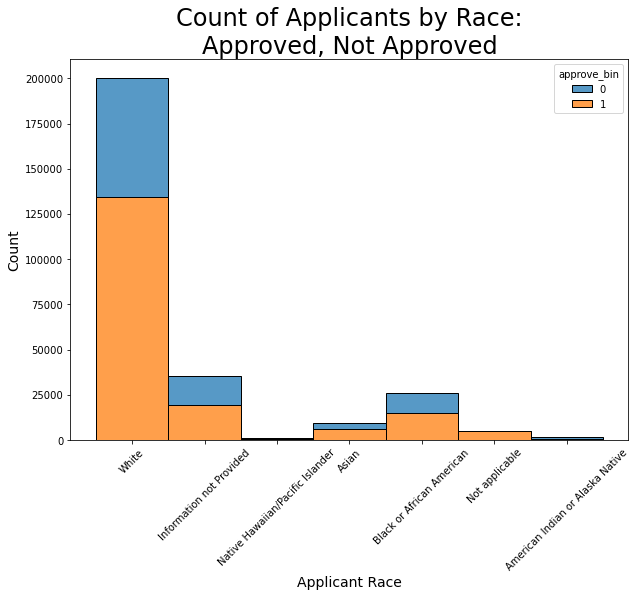

In [25]:
plt.figure(figsize=(10, 7), facecolor="w")

sns.histplot(data=fl_df, x="applicant_race_name_1", hue="approve_bin", multiple="stack")
plt.xticks(rotation=45)

plt.title("Count of Applicants by Race:\nApproved, Not Approved", size=24)
plt.xlabel("Applicant Race", size=14)
plt.ylabel("Count", size=14);

#### Count of Applicant Denied by Race: Split by Denied Reason
----

Few things of note:

Credit history is a major factor for African Americans but not other races

Plot seems to be printing wrong?

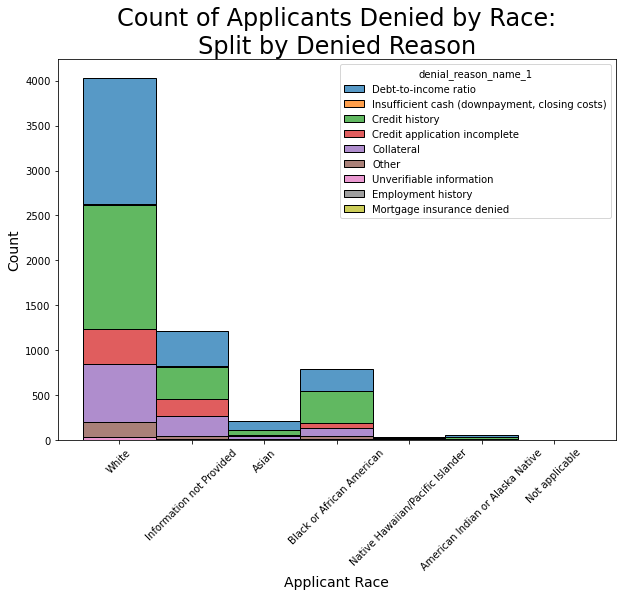

In [26]:
plt.figure(figsize=(10, 7), facecolor="w")


sns.histplot(data=fl_df[(fl_df["approve_bin"] == 0)],
             x="applicant_race_name_1",
             hue="denial_reason_name_1",
             multiple="stack",
             stat="frequency")
plt.xticks(rotation=45)

plt.title("Count of Applicants Denied by Race:\nSplit by Denied Reason", size=24)
plt.xlabel("Applicant Race", size=14)
plt.ylabel("Count", size=14);

In [27]:
fl_df.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type',
       'loan_purpose_name', 'loan_purpose', 'owner_occupancy_name',
       'owner_occupancy', 'loan_amount_000s', 'preapproval_name',
       'preapproval', 'action_taken_name', 'action_taken', 'msamd_name',
       'msamd', 'state_name', 'state_abbr', 'state_code', 'county_name',
       'county_code', 'census_tract_number', 'applicant_ethnicity_name',
       'applicant_ethnicity', 'co_applicant_ethnicity_name',
       'co_applicant_ethnicity', 'applicant_race_name_1', 'applicant_race_1',
       'co_applicant_race_name_1', 'co_applicant_race_1', 'applicant_sex_name',
       'applicant_sex', 'co_applicant_sex_name', 'co_applicant_sex',
       'applicant_income_000s', 'purchaser_type_name', 'purchaser_type',
       'denial_reason_name_1', 'denial_reason_1', 'denial_reason_name_2',
       'denial_reason_2', 'denial_reason_name_3', 'denial_reason_3',
     

#### Population by Metro Area
----

 - According to the dataset Orlando has the largest population. This conflicts with Google Results.

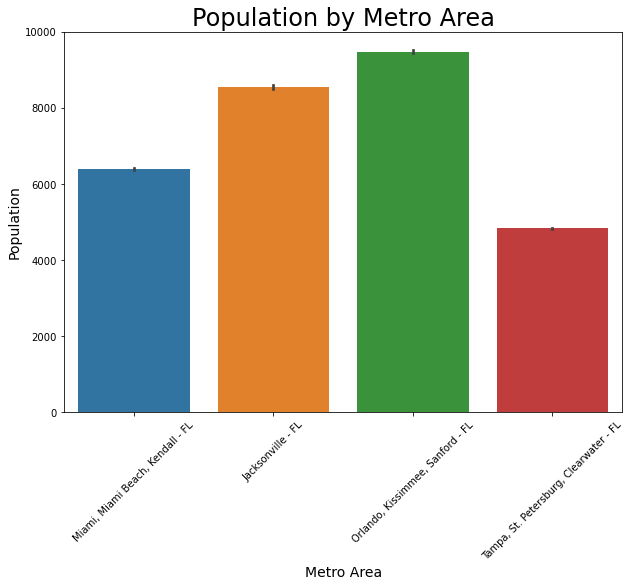

In [28]:
plt.figure(figsize=(10, 7), facecolor="w")


sns.barplot(data=fl_df,
            x="msamd_name",
            y="population")
plt.xticks(rotation=45)

plt.title("Population by Metro Area", size=24)
plt.xlabel("Metro Area", size=14)
plt.ylabel("Population", size=14);

#### Minority Population by Metro Area
----

 - Jacksonville is predominantly white and is the largest population according to Google
 - Miami is predominently minority and is half the size of Jacksonville according to Google

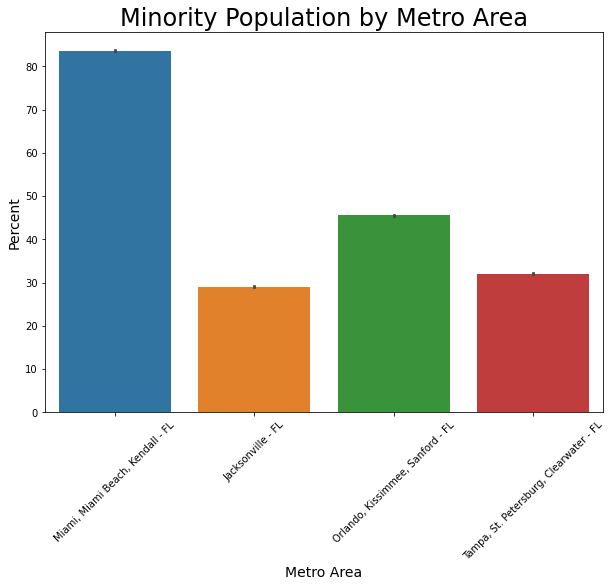

In [29]:
plt.figure(figsize=(10, 7), facecolor="w")


sns.barplot(data=fl_df,
            x="msamd_name",
            y="minority_population")
plt.xticks(rotation=45)

plt.title("Minority Population by Metro Area", size=24)
plt.xlabel("Metro Area", size=14)
plt.ylabel("Percent", size=14);

#### Number of Instances of Each Metro Area
----

 - Most loan applications were in Tamp and Orlando
 - could suggest more growth occuring in those areas but beyond the scope of this project

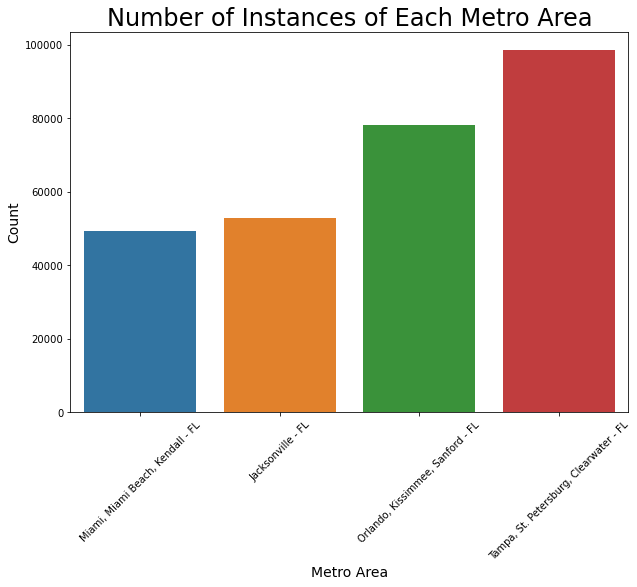

In [30]:
plt.figure(figsize=(10, 7), facecolor="w")


sns.countplot(data=fl_df,
             x="msamd_name")
plt.xticks(rotation=45)

plt.title("Number of Instances of Each Metro Area", size=24)
plt.xlabel("Metro Area", size=14)
plt.ylabel("Count", size=14);

#### Loan Approval by Type
----

 - Roughly the same loan approval rates regardless of type
 - Conventional is the most common type of loan

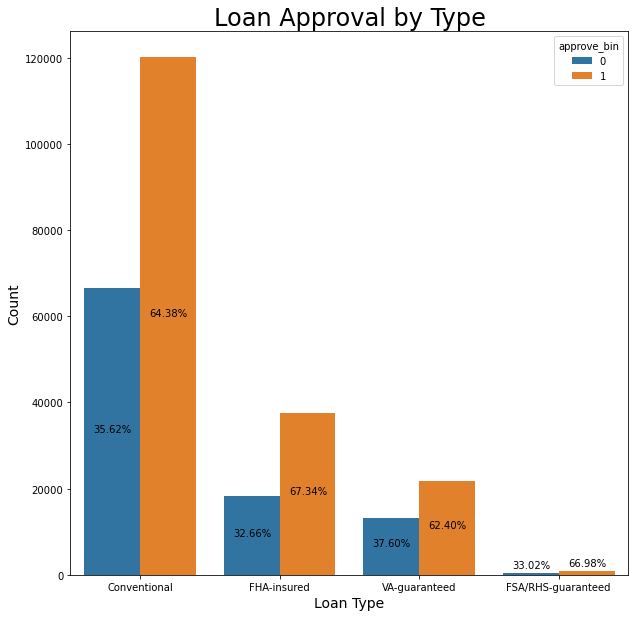

In [31]:
plt.figure(figsize=(10, 10), facecolor="w")

ax = sns.countplot(data=fl_df, x="loan_type_name", hue="approve_bin")

totals = fl_df["loan_type_name"].value_counts().values
np.append(totals, totals)

for i, patch in enumerate(ax.patches):
    if i > 3:
        i = i-4
    percent = f"{(patch.get_height()/totals[i]):.2%}"
    x = patch.get_x() + patch.get_width()/6
    y = patch.get_height() / 2
    if i == 3:
        y = patch.get_height() + 1000
    ax.text(x, y, percent, color="k")
    
plt.title("Loan Approval by Type", size=24)
plt.xlabel("Loan Type", size=14)
plt.ylabel("Count", size=14);

#### Loan Approval by Type
----

 - Whites signifigantly more likely to be approved than other races
 - Most other races have roughly between 50/50 and 60/40 odds of being approved
 - Not applicable is nearly 100. Turns out these are repurchased loans

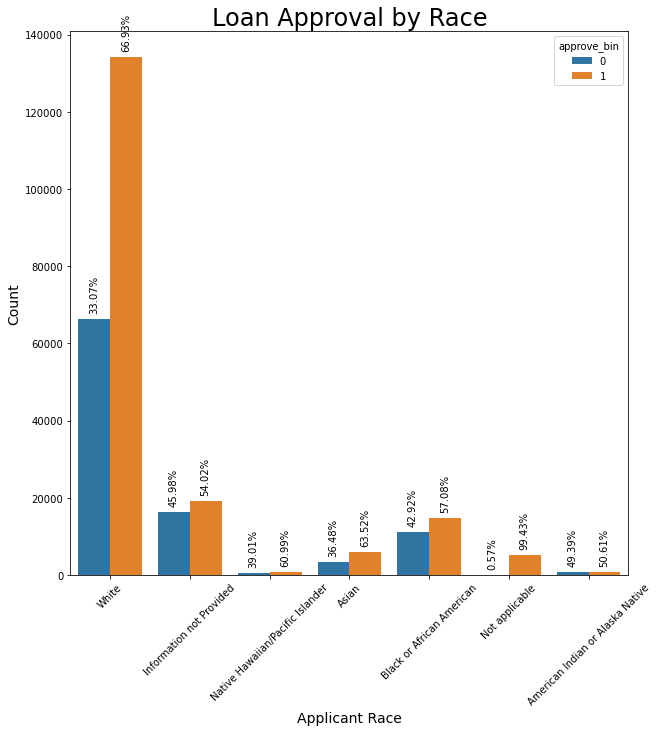

In [32]:
fig = plt.figure(figsize=(10, 10), facecolor="w")

ax = sns.countplot(data=fl_df, x="applicant_race_name_1", hue="approve_bin");
plt.xticks(rotation=45)

totals = [200384, 35651, 1197, 9324, 25928, 5102, 1484]
np.append(totals, totals)

for i, patch in enumerate(ax.patches):
    if i > 6:
        i = i-7
    percent = f"{(patch.get_height()/totals[i]):.2%}"
    x = patch.get_x() + patch.get_width()/3
    y = patch.get_height() + 2000
    ax.text(x, y, percent, color="k", rotation=90)
    
plt.title("Loan Approval by Race", size=24)
plt.xlabel("Applicant Race", size=14)
plt.ylabel("Count", size=14);

Adjusting to normalize the data

This more clearly demonstrates the difference between whites vs all other races in approval percentages.

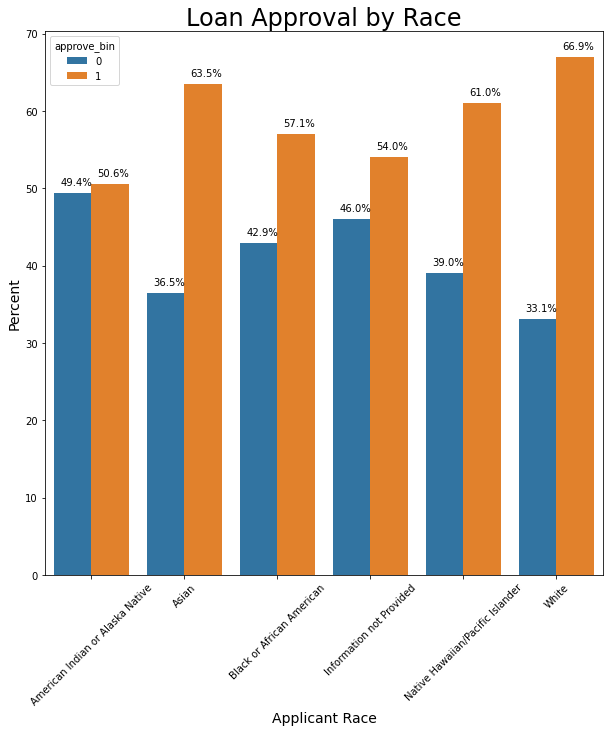

In [33]:
fig = plt.figure(figsize=(10, 10), facecolor="w")
group = (fl_df.groupby(["applicant_race_name_1"])["approve_bin"]
                     .value_counts(normalize=True)
                     .rename("percentage")
                     .mul(100)
                     .reset_index()
                     .sort_values('applicant_race_name_1'))
group = group[group["applicant_race_name_1"] != "Not applicable"]

ax = sns.barplot(x="applicant_race_name_1", y="percentage", hue="approve_bin", data=group)

for patch in ax.patches:
    text = f"{patch.get_height():.3}%"
    x = patch.get_x() + patch.get_width()/6
    y = patch.get_height() + 1
    ax.text(x, y, text, size=10, color="k")


plt.title("Loan Approval by Race", size=24)
plt.xlabel("Applicant Race", size=14)
plt.ylabel("Percent", size=14)
plt.xticks(rotation=45);

#### Loans by Loan Type: Split by Result
----

 - Conventional Loans are the most prominent.
 - Most loan do get approved
 - A surprising amount of loans are withdrawn by the applicants
 - Concentional has a much higher chance of loan denial

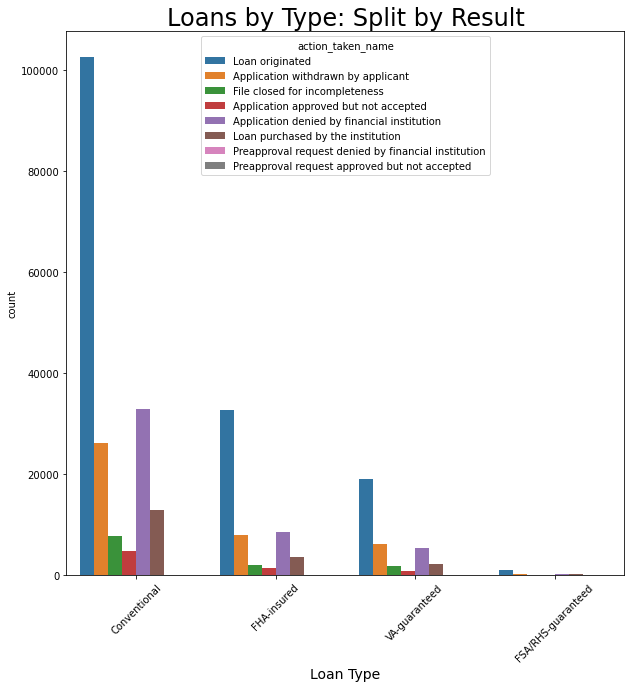

In [34]:
plt.figure(figsize=(10, 10), facecolor="w")

sns.countplot(data=fl_df, x="loan_type_name", hue="action_taken_name");
plt.xticks(rotation=45)
plt.title("Loans by Type: Split by Result", size=24)
plt.xlabel("Loan Type", size=14);

| Race Name | Race Number  |
| --------- | ------------ |
| American Indian or Alaska Native | 1 |
| Asian | 2 |
| Black or African American | 3 |
| Native Hawaiian or Other Pacific Islander | 4 |
| White | 5 |
| Information not provided by applicant | 6 |
| N/A | 7 |
| No co-applicant | 8 |

<AxesSubplot:xlabel='denial_reason_2', ylabel='Count'>

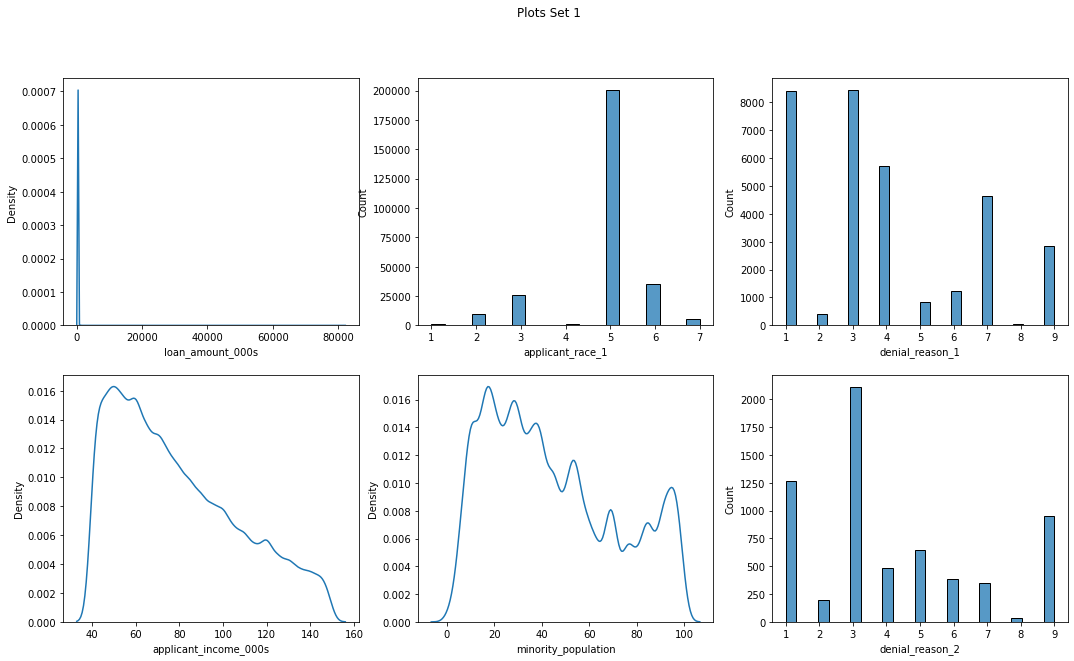

In [35]:
fig, axes = plt.subplots(2,3, figsize=(18,10), facecolor="w")

fig.suptitle('Plots Set 1')

sns.kdeplot(ax=axes[0,0], data=fl_df,x='loan_amount_000s')
sns.histplot(ax=axes[0,1], data=fl_df,x='applicant_race_1')
sns.histplot(ax=axes[0,2], data=fl_df,x='denial_reason_1')
sns.kdeplot(ax=axes[1,0], data=fl_df,x='applicant_income_000s')
sns.kdeplot(ax=axes[1,1], data=fl_df,x='minority_population')
sns.histplot(ax=axes[1,2], data=fl_df,x='denial_reason_2')

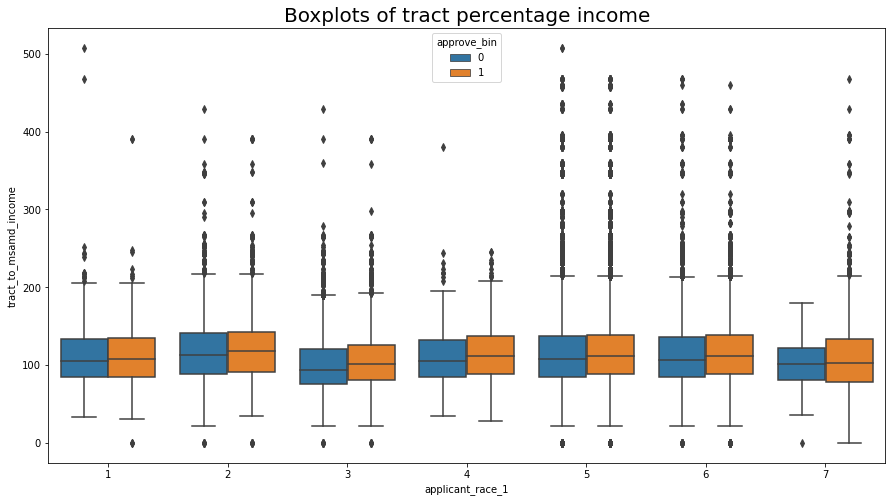

In [36]:
plt.figure(figsize=(15,8), facecolor="w")
sns.boxplot(data=fl_df,x='applicant_race_1',y='tract_to_msamd_income',
               hue='approve_bin')
plt.title('Boxplots of tract percentage income', size=20);

A little additional groupby to see class means of approval

In [37]:
fl_df.groupby('applicant_ethnicity_name').approve_bin.mean()

applicant_ethnicity_name
Hispanic or Latino          0.629054
Information not Provided    0.547312
Not Hispanic or Latino      0.662293
Not applicable              0.985258
Name: approve_bin, dtype: float64

C:\Users\Chris\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


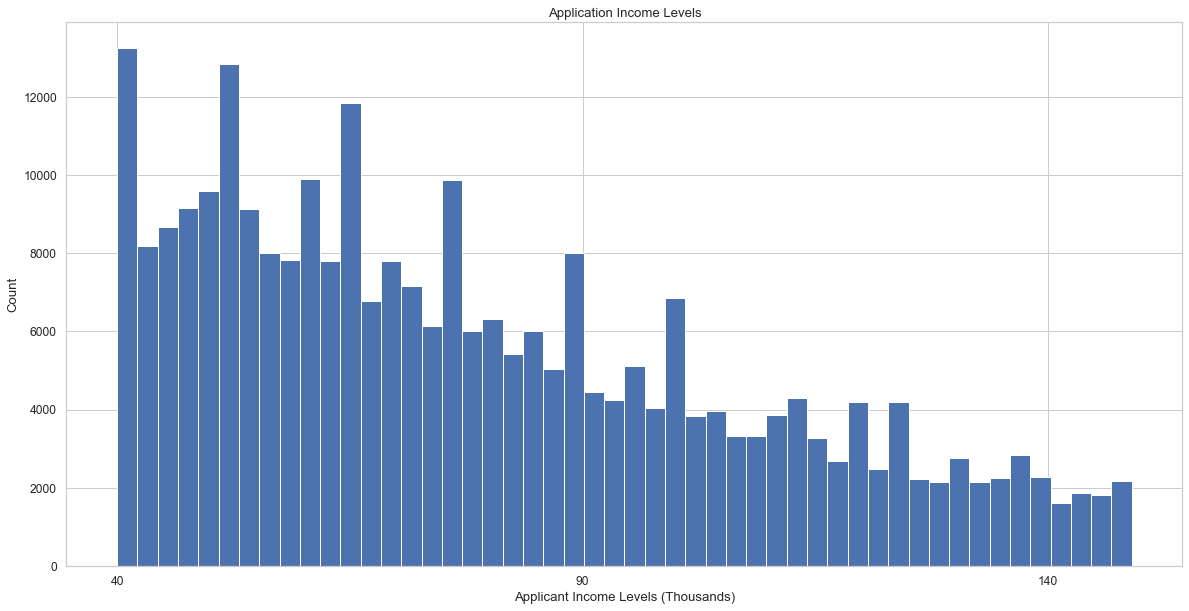

In [38]:

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [20, 10]})
sns.distplot(fl_df['applicant_income_000s'], norm_hist=False, kde=False, bins=50, hist_kws={"alpha": 1}
).set(xlabel='Applicant Income Levels (Thousands)', ylabel='Count');
plt.xticks([x for x in range(int(fl_df['applicant_income_000s'].min()),
                             int(fl_df['applicant_income_000s'].max()),
                             50)])
plt.title('Application Income Levels');

### Correlation
----
action_taken - approve_bin derived from this. Needs to be dropped before modelling
purchaser_type - only exists if loans approved. Needs to be dropped before modelling
loan_purpose - limiting to home approval only. Disregard.
lien_status - leins apply to originated loans mainly. Drop to prevent bleed.

In [39]:
fl_df.corr()[['approve_bin']].sort_values(by='approve_bin',key=np.abs,ascending=False)

,approve_bin
approve_bin,1.000000
action_taken,-0.611333
purchaser_type,0.523490
loan_purpose,-0.237474
lien_status,0.135968
preapproval,-0.101038
property_type,-0.066949
minority_population,-0.057986
hud_median_family_income,0.048222
applicant_income_000s,0.043075


In [40]:
fl_df.to_csv("../cfpb_data/cleaned_fl_df.csv")